In [1]:
import pandas as pd
import numpy as np
import networkx as nx

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
articles = pd.read_csv('./data/articles.csv')
customers = pd.read_csv('./data/customers.csv')
transactions_train = pd.read_csv('./data/transactions_train.csv')

# Articles

In [3]:
print(articles.shape)
articles.head()

(105542, 25)


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [12]:
# number of unique values in each column
for i in articles.columns:
    print('{}: {}'.format(i, articles[i].nunique()))

article_id: 105542
product_code: 47224
prod_name: 45875
product_type_no: 132
product_type_name: 131
product_group_name: 19
graphical_appearance_no: 30
graphical_appearance_name: 30
colour_group_code: 50
colour_group_name: 50
perceived_colour_value_id: 8
perceived_colour_value_name: 8
perceived_colour_master_id: 20
perceived_colour_master_name: 20
department_no: 299
department_name: 250
index_code: 10
index_name: 10
index_group_no: 5
index_group_name: 5
section_no: 57
section_name: 56
garment_group_no: 21
garment_group_name: 21
detail_desc: 43404


# Customers

In [19]:
print(customers.shape)
print(customers.customer_id.nunique())
customers.head()

(1371980, 7)
1371980


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [20]:
# number of unique values in each column
for i in customers.columns:
    print('{}: {}'.format(i, customers[i].nunique()))

customer_id: 1371980
FN: 1
Active: 1
club_member_status: 3
fashion_news_frequency: 4
age: 84
postal_code: 352899


In [23]:
print(customers.age.min())
print(customers.age.max())
print(customers.age.median())

16.0
99.0
32.0


In [18]:
customer_purchase = customers.merge(transactions_train, on='customer_id')
# should have 31788324 (number of transactions) rows
print(customer_purchase.shape)
customer_purchase.head()

(31788324, 11)


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,t_dat,article_id,price,sales_channel_id
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2018-12-27,625548001,0.044051,1
1,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2018-12-27,176209023,0.035576,1
2,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2018-12-27,627759010,0.030492,1
3,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2019-05-02,697138006,0.010153,2
4,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2019-05-25,568601006,0.050831,2


In [35]:
# most popular article for eahc individual
article_pop = pd.DataFrame(customer_purchase.groupby(['customer_id', 'article_id']).count()['t_dat']).reset_index()
article_pop = pd.DataFrame(article_pop.groupby('customer_id').max()).reset_index()[['customer_id','article_id']]
article_pop.head()

,customer_id,article_id
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,890498002
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,866383001
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,870304002
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,742079001
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,927530004


In [38]:
customer_purchase.customer_id[0]

'00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657'

In [44]:
# customer age
# use max as this would be the most recent age
cust_age = pd.DataFrame(customer_purchase.groupby(['customer_id']).max()['age']).reset_index()[['customer_id', 'age']]
cust_age.head()

,customer_id,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,49.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,25.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,24.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,54.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,52.0


In [46]:
# average sales price
# let's us know if they buy luxurious articles or not
cust_price = pd.DataFrame(customer_purchase.groupby(['customer_id']).mean()['price']).reset_index()[['customer_id', 'price']]
cust_price.head()

,customer_id,price
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.030904
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.030255
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.039154
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.030492
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0.036130


In [ ]:
# frequency of purchases
# those buying more frequently might be into the latest trend whereas those that don't are probably just buying clothes


# Transactions_train

In [5]:
print(transactions_train.shape)
transactions_train.head()

(31788324, 5)


,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [26]:
# number of unique values in each column
for i in transactions_train.columns:
    print('{}: {}'.format(i, transactions_train[i].nunique()))

t_dat: 734
customer_id: 1362281
article_id: 104547
price: 9857
sales_channel_id: 2


In [28]:
print(transactions_train.t_dat.min())
print(transactions_train.t_dat.max())

2018-09-20
2020-09-22


In [29]:
print(transactions_train.price.min())
print(transactions_train.price.max())

1.6949152542372878e-05
0.5915254237288136


In [30]:
print(transactions_train.sales_channel_id.min())
print(transactions_train.sales_channel_id.max())

1
2


# Unique Features

In [6]:
print(transactions_train.shape)
print(transactions_train.customer_id.nunique())
print(transactions_train.article_id.nunique())

(31788324, 5)
1362281
104547


In [15]:
transactions_train.groupby(['customer_id', 'article_id']).ngroups

27306439

In [16]:
transactions = nx.Graph()

# add connections from the dataset to the graph
for _, edge in transactions_train.iterrows():
    transactions.add_edge(edge['customer_id'], edge['article_id'])

KeyboardInterrupt: 

In [6]:
trans_per_user = pd.DataFrame(transactions_train.groupby(['customer_id']).count()['article_id']).reset_index()
trans_per_user.head()

,customer_id,article_id
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,21
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,86
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,18
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,2
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,13


array([[<AxesSubplot:title={'center':'article_id'}>]], dtype=object)

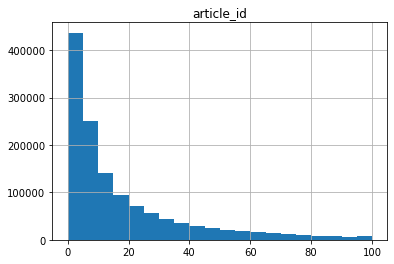

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
trans_per_user.hist(bins=20, range=(0,100))

In [14]:
trans_per_user[trans_per_user.article_id<=2].shape

(258955, 2)

In [30]:
# rating as the number of purchases for the item
article_rating = pd.DataFrame(transactions_train.groupby(['customer_id', 'article_id']).count()['t_dat']).reset_index().rename(columns={'t_dat': 'article_rating'})
article_rating.head()

,customer_id,article_id,article_rating
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,176209023,1
1,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,568601006,2
2,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,568601043,1
3,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,607642008,1
4,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,625548001,1


In [24]:
# average ratings of user u
avg_rating = pd.DataFrame(article_rating.groupby('customer_id').mean()['t_dat']).reset_index().rename(columns={'t_dat': 'avg_rating'})
avg_rating.head()

,customer_id,avg_rating
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,1.105263
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,1.343750
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,1.285714
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,1.000000
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.083333


In [32]:
article_rating['article_id'] = article_rating.article_id.astype('str')
rating_matrix = article_rating.pivot_table(index='customer_id', columns='article_id', values='article_rating')
rating_matrix.head()

IndexError: index 688600994 is out of bounds for axis 0 with size 688470939